## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 2 


*****
Assignment 2 is worth 10% of the final grade. Submit the ipynb file and the generated pdf output file. Failing to submit both files will be subject to a mark deduction.
*****



### Preparation

The dataset is related to Forest Fires. For more info: https://archive.ics.uci.edu/ml/datasets/forest+fires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Q1. 

Read the csv file from the this URL https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv. Save it to a data frame called Forest. Check the first five records. (10 points)
[Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

Forest = pd.read_csv(url)

print(Forest.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


# Q2.
How many observations are there in the dataset? How many observations are there with both a significant fire (burned area > 0) and rain? (10 points) [Relevent API1](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html) , [Relevant Pandas API 2](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#)

In [3]:
total_obs = Forest.shape[0]
print("Total observations =", total_obs)

fire_and_rain_obs = Forest[(Forest['area'] > 0) & (Forest['rain'] > 0)].shape[0]
print("Observations with significant fire and rain =", fire_and_rain_obs)


Total observations = 517
Observations with significant fire and rain = 2


# Q3.
Show the columns month, day, area of all the observations with a significant fire (burned area >0 ). (10 points) [Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [4]:
significant_fire = Forest[Forest['area'] > 0][['month', 'day', 'area']]
print(significant_fire)


    month  day   area
138   jul  tue   0.36
139   sep  tue   0.43
140   sep  mon   0.47
141   aug  wed   0.55
142   aug  fri   0.61
..    ...  ...    ...
509   aug  fri   2.17
510   aug  fri   0.43
512   aug  sun   6.44
513   aug  sun  54.29
514   aug  sun  11.16

[270 rows x 3 columns]


# Q4.
How large are the five largest fires (i.e. having largest area)? (10 points) [Relevant API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

In [5]:
largest_fires = Forest.nlargest(5, 'area')['area']
print(largest_fires)



238    1090.84
415     746.28
479     278.53
237     212.88
236     200.94
Name: area, dtype: float64


# Q5. 
For the records you obtained from the previous question, what are the corresponding month, temp, RH, wind, rain, area? (10 points)

In [6]:
largest_fires_records = Forest.nlargest(5, 'area')[['month', 'temp', 'RH', 'wind', 'rain', 'area']]
print(largest_fires_records)


    month  temp  RH  wind  rain     area
238   sep  25.1  27   4.0   0.0  1090.84
415   aug  27.5  27   4.9   0.0   746.28
479   jul  22.6  57   4.9   0.0   278.53
237   sep  18.8  40   2.2   0.0   212.88
236   sep  18.2  46   1.8   0.0   200.94


# Q6.
For the whole dataset, reorder factor levels of month to be from Jan to Dec. (10 points)

In [7]:
# First, create a dictionary adding month names to numerical values
month_order = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Reorder the factor levels of the month column
Forest['month'] = pd.Categorical(Forest['month'], categories=sorted(month_order, key=month_order.get), ordered=True)

# Print the reordered factor levels
print(Forest['month'])


0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: category
Categories (12, object): ['jan' < 'feb' < 'mar' < 'apr' ... 'sep' < 'oct' < 'nov' < 'dec']


# Q7.
Add one column to the data indicating whether a fire occurred for each observation ('TRUE' for area>0 and 'FALSE' for area==0). (10 points)

In [8]:
# Add a new column 'fire_occurred' based on 'area' values
Forest['fire_occurred'] = Forest['area'].apply(lambda x: 'TRUE' if x > 0 else 'FALSE')

# Print the updated data
print(Forest.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  fire_occurred  
0         FALSE  
1         FALSE  
2         FALSE  
3         FALSE  
4         FALSE  


#Q8. 
What is the mean area/wind/temp/RH per month? (10 points)

In [9]:
mean_monthly_values = Forest.groupby('month').mean()[['area', 'wind', 'temp', 'RH']]
print(mean_monthly_values)


            area      wind       temp         RH
month                                           
jan     0.000000  2.000000   5.250000  89.000000
feb     6.275000  3.755000   9.635000  55.700000
mar     4.356667  4.968519  13.083333  40.000000
apr     8.891111  4.666667  12.044444  46.888889
may    19.240000  4.450000  14.650000  67.000000
jun     5.841176  4.135294  20.494118  45.117647
jul    14.369687  3.734375  22.109375  45.125000
aug    12.489076  4.086413  21.631522  45.489130
sep    17.942616  3.557558  19.612209  42.843023
oct     6.638000  3.460000  17.093333  37.466667
nov     0.000000  4.500000  11.800000  31.000000
dec    13.330000  7.644444   4.522222  38.444444


<ipython-input-9-6e0923aadddf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_monthly_values = Forest.groupby('month').mean()[['area', 'wind', 'temp', 'RH']]


# Q9.
How many observations are there in each month? Visualize by using a barplot in descending order. (10 points) [Relevant API 1](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) [Relevant API  2](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

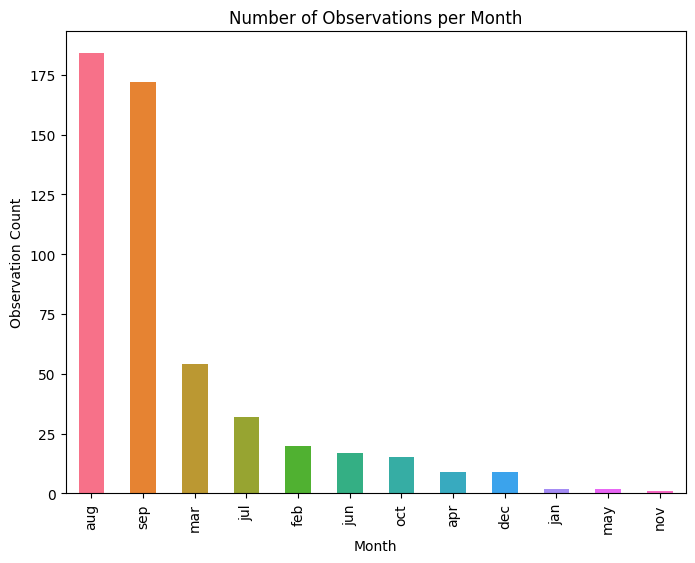

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of obs in each month
obs_per_month = Forest['month'].value_counts().sort_values(ascending=False)

# Applying different colors for each bar
colors = sns.color_palette('husl', len(obs_per_month))

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
obs_per_month.plot(kind='bar', color=colors)
plt.xlabel('Month')
plt.ylabel('Observation Count')
plt.title('Number of Observations per Month')
plt.show()



# Q10. 
How many observations are there with burned area greater than zero in each month? Visualize by using a barplot in descending order. (10 points)

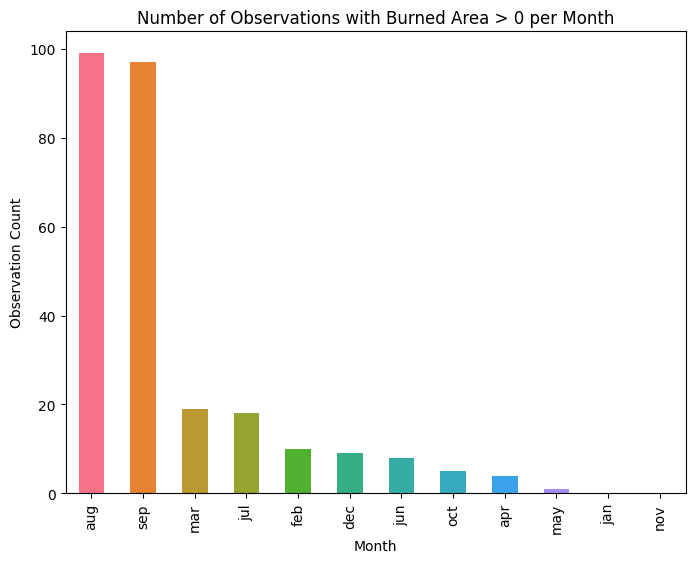

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

burned_area_greater_than_zero = Forest[Forest['area'] > 0]

obs_per_month = burned_area_greater_than_zero['month'].value_counts().sort_values(ascending=False)

colors = sns.color_palette('husl', len(obs_per_month))

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
obs_per_month.plot(kind='bar', color=colors)
plt.xlabel('Month')
plt.ylabel('Observation Count')
plt.title('Number of Observations with Burned Area > 0 per Month')
plt.show()


This is the end of Assignment 2

Ceni Babaoglu, PhD